In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import investpy
import datetime
import plotly.express as px
from plotly.subplots import make_subplots


import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

# Enable matplot widgets
%matplotlib widget

              Open     High     Low   Close  Volume Currency
Date                                                        
2008-11-01  968.67  1007.51  741.02  896.24       0      USD
2008-12-01  888.61   918.85  815.69  903.25       0      USD
2009-01-01  902.99   943.85  804.30  825.88       0      USD
              Open     High     Low   Close  Volume Currency
Date                                                        
2008-11-01  959.17  1013.58  759.00  892.93       0      USD
2008-12-01  893.04   936.89  815.89  920.23       0      USD
2009-01-01  920.23   958.94  808.52  838.83       0      USD


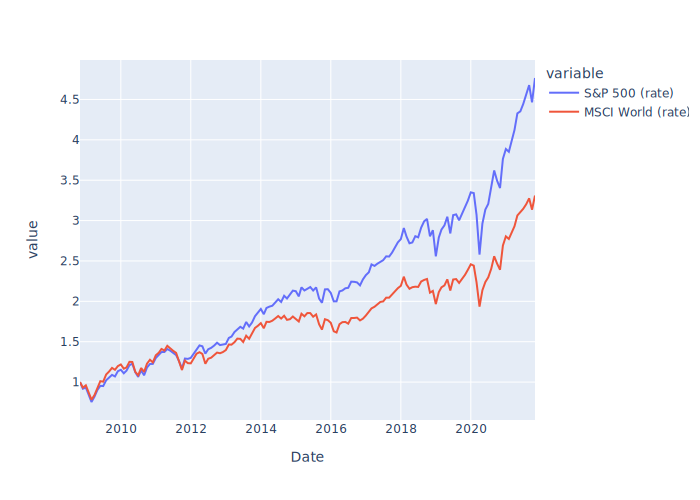

In [2]:
# Load the dataset

from_date = "01/11/2008"
to_date = "01/11/2021"

df1_nombre = "S&P 500"
df1 = investpy.get_index_historical_data(index=df1_nombre,
                                        country="united states",
                                        from_date=from_date,
                                        to_date=to_date,
                                        interval='Monthly',
                                        order="asc"
                                   )
df2_nombre =  "MSCI World"
df2 = investpy.get_index_historical_data(index=df2_nombre,
                                        country="world",
                                        from_date=from_date,
                                        to_date=to_date,
                                        interval='Monthly',
                                        order="asc"
                                   )

print(df1.head(3))
print(df2.head(3))

df1_rate = df1['Open'] / df1['Open'][0]
df2_rate = df2['Open'] / df2['Open'][0]

assert len(df1.index) == len(df2.index)

df_plot = pd.DataFrame(index=df1.index)
df_plot[df1_nombre+' (rate)'] = df1_rate
df_plot[df2_nombre+' (rate)'] = df2_rate
fig = px.line(df_plot)
fig.show('svg')

In [3]:
inversion_mensual = np.ones((len(df1.index)),) * 200
inversion_mensual[0] += 5000
inversion = inversion_mensual.cumsum()

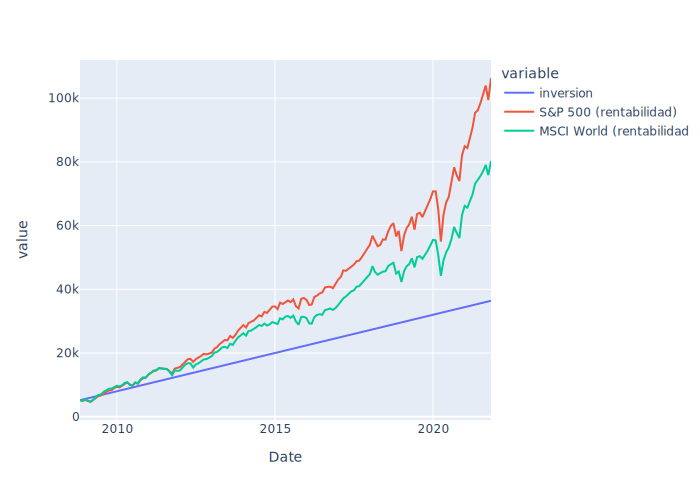

In [4]:
df1_participaciones = inversion_mensual / df1['Open']
df1_rentabilidad = df1_participaciones.cumsum() * df1['Open']

df2_participaciones = inversion_mensual / df2['Open']
df2_rentabilidad = df2_participaciones.cumsum() * df2['Open']


df_plot = pd.DataFrame(index=df1.index)
df_plot['inversion'] = inversion
df_plot[df1_nombre+' (rentabilidad)'] = df1_rentabilidad
df_plot[df2_nombre+' (rentabilidad)'] = df2_rentabilidad
fig = px.line(df_plot)
fig.show('svg')

In [5]:
# Resultados rentabilidad
anyos_inversion = len(df1.index)/12
print(f"[*] Años de inversion: {anyos_inversion}")
print()
df1_final = df1_rentabilidad[-1] / inversion[-1] -1
print("=========[ {0} ]=========\n{1} ({2} anual)\n".format(
    df1_nombre,
    df1_final,
    df1_final / anyos_inversion
))
df2_final = df2_rentabilidad[-1] / inversion[-1] -1
print("=========[ {0} ]=========\n{1} ({2} anual)\n".format(
    df2_nombre,
    df2_final,
    df2_final / anyos_inversion
))


[*] Años de inversion: 13.083333333333334

=========[ S&P 500 ]=========
1.920837046407219 (0.14681557042602947 anual)

=========[ MSCI World ]=========
1.2053513009445762 (0.0921287618556364 anual)

